### Student Information
Name: 陳翼弘

Student ID: 103033617

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
# -- set up dataset environment-- #
import os
import os.path
import helpers.data_mining_helpers as dmh
import numpy as np
nas_folder_path = "NAS_NEAF/課程/2021_DataMining/sentiment labelled sentences/sentiment labelled sentences"
file_names = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']


In [2]:
# -- load dataset -- #
import csv

dataset = []
dataset_data = []
dataset_score = []
dataset_lib = []
dataset_lib_name = []
for index, file_name in enumerate(file_names):
    
    fileID = open(os.path.join(os.path.expanduser('~'), nas_folder_path, file_names[index]))
    dataset_temp = list(csv.reader(fileID, delimiter = "\t"))
    fileID.close()    
    # dataset_data_temp = [i[0] for i in dataset]
    # dataset_score_temp = [i[1] for i in dataset]
    
    dataset.extend(dataset_temp)
    dataset_data.extend([i[0] for i in dataset_temp])
    dataset_score.extend([i[1] for i in dataset_temp])
    dataset_lib.extend([int(index) for i in dataset_temp])
    dataset_lib_name.extend([file_name[:-13] for i in dataset_temp])

In [3]:
len(dataset_lib)

2748

In [4]:
# -- show firt # data -- #
dataset_lib_name

['amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells

In [5]:
dataset_data[0:2]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.']

In [6]:
print(file_names[dataset_lib[0]])

amazon_cells_labelled.txt


In [7]:
dataset_lib[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
import pandas as pd
# import helpers.data_mining_helpers as dmh


DS = pd.DataFrame(dataset, columns=['text', 'score'])

In [9]:
DS

,text,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [10]:
DS['lib_name'] = dataset_lib_name

In [11]:
DS['lib'] = dataset_lib

In [12]:
DS = DS.sample(frac=1).reset_index(drop=True)

In [13]:
DS

,text,score,lib_name,lib
0,It does everything the description said it would.,1,amazon_cells,0
1,"After one bite, I was hooked.",1,yelp,2
2,"Garbo, who showed right off the bat that her t...",1,imdb,1
3,Reasonably priced also!,1,yelp,2
4,Essentially you can forget Microsoft's tech su...,0,amazon_cells,0
...,...,...,...,...
2743,The Han Nan Chicken was also very tasty.,1,yelp,2
2744,My experience was terrible..... This was my fo...,0,amazon_cells,0
2745,Omelets are to die for!,1,yelp,2
2746,I can't tell you how disappointed I was.,0,yelp,2


In [14]:
DS.iloc[::10, 0:2][0:10]

,text,score
0,It does everything the description said it would.,1
10,it was a drive to get there.,0
20,Service is friendly and inviting.,1
30,"Both films are terrible, but to the credit of ...",0
40,"Service is quick and even ""to go"" orders are j...",1
50,Just what I wanted.,1
60,Always a great time at Dos Gringos!,1
70,The chipolte ranch dipping sause was tasteless...,0
80,"Overall, I am psyched to have a phone which ha...",1
90,"All in all, I can assure you I'll be back.",1


In [15]:
DS.loc[::10, 'text'][0:10]

0     It does everything the description said it would.
10                         it was a drive to get there.
20                    Service is friendly and inviting.
30    Both films are terrible, but to the credit of ...
40    Service is quick and even "to go" orders are j...
50                                  Just what I wanted.
60                  Always a great time at Dos Gringos!
70    The chipolte ranch dipping sause was tasteless...
80    Overall, I am psyched to have a phone which ha...
90           All in all, I can assure you I'll be back.
Name: text, dtype: object

In [16]:
DS.isnull()

,text,score,lib_name,lib
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2743,False,False,False,False
2744,False,False,False,False
2745,False,False,False,False
2746,False,False,False,False


In [17]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [18]:
DS.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [19]:
dummy_series = pd.Series(["dummy_record", "1"], index=["text", "score"])

In [20]:
dummy_series


text     dummy_record
score               1
dtype: object

In [21]:
result_with_series = DS.append(dummy_series, ignore_index=True)

In [22]:
result_with_series

,text,score,lib_name,lib
0,It does everything the description said it would.,1,amazon_cells,0.0
1,"After one bite, I was hooked.",1,yelp,2.0
2,"Garbo, who showed right off the bat that her t...",1,imdb,1.0
3,Reasonably priced also!,1,yelp,2.0
4,Essentially you can forget Microsoft's tech su...,0,amazon_cells,0.0
...,...,...,...,...
2744,My experience was terrible..... This was my fo...,0,amazon_cells,0.0
2745,Omelets are to die for!,1,yelp,2.0
2746,I can't tell you how disappointed I was.,0,yelp,2.0
2747,Not a pleasant voyage of self-discovery.,0,imdb,1.0


In [23]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [24]:
dummy_dict=[{'text':'dummy_record', 'score':'1'}]

In [25]:
DS = DS.append(dummy_dict, ignore_index=True)

In [26]:
len(DS)

2749

In [27]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [28]:
DS.dropna(inplace=True)

In [29]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [30]:
len(DS)

2748

In [31]:
sum(DS.duplicated('text'))

17

In [32]:
DS.duplicated('text')

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [33]:
duplicate=DS[DS.duplicated('text')]

In [34]:
duplicate['text']

559                                          Great Phone.
986                                         Works great!.
1297                                         Great phone.
1500                     Definitely worth checking out.  
1636                                     I won't be back.
1662                              Don't buy this product.
1789                                              10/10  
1906                                        Great phone!.
1912    If you like a loud buzzing to override all you...
1965                                   I love this place.
2206                                   Not recommended.  
2302                                This is a great deal.
2351                     Excellent product for the price.
2546                    I would not recommend this place.
2560                               The food was terrible.
2669                                        Does not fit.
2738                                         Works great.
Name: text, dt

In [35]:
DS.drop_duplicates(keep=False, inplace=True)

In [36]:
len(DS)

2714

In [37]:
DS_sample = DS.sample(n=1000)

In [38]:
DS_sample[0:4]

,text,score,lib_name,lib
2421,I am very happy,1,amazon_cells,0.0
2469,It has everything I need and I couldn't ask fo...,1,amazon_cells,0.0
1915,steve martin delivers a really funny performan...,1,imdb,1.0
152,I know he was a contract player with little co...,0,imdb,1.0


# Exercise 6 (take home)

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

yelp            992
amazon_cells    980
imdb            742
Name: lib_name, dtype: int64


<AxesSubplot:title={'center':'Library distribution'}>

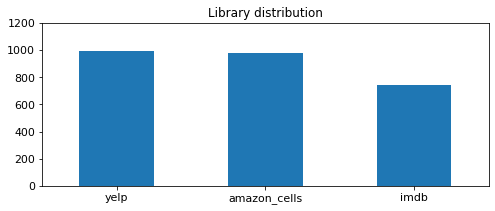

In [40]:
print(DS.lib_name.value_counts())
DS.lib_name.value_counts().plot(kind = 'bar',
                                title = 'Library distribution',
                                ylim = [0, 1200],
                                rot = 0, fontsize = 11, figsize = (8,3))

# Exercise 7

amazon_cells    364
yelp            358
imdb            278
Name: lib_name, dtype: int64


<AxesSubplot:title={'center':'Sample lib distribution'}>

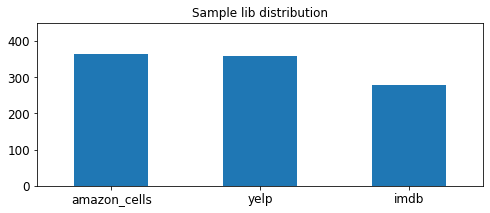

In [41]:
print(DS_sample.lib_name.value_counts())


# plot barchart for DS_sample
DS_sample.lib_name.value_counts().plot(kind = 'bar',
                                       title = 'Sample lib distribution',
                                       ylim = [0, 450],
                                       rot = 0, fontsize = 12, figsize = (8,3))

# Exercise 8

In [42]:
X = DS_sample.lib_name.value_counts().index

In [43]:
X_axis = np.arange(len(X))

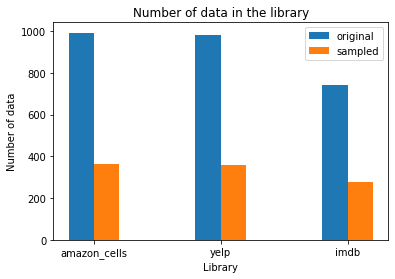

In [44]:
plt.bar(X_axis - 0.1, DS.lib_name.value_counts(), 0.2, label='original')
plt.bar(X_axis + 0.1, DS_sample.lib_name.value_counts(), 0.2, label='sampled')

plt.xticks(X_axis, X)
plt.xlabel("Library")
plt.ylabel("Number of data")
plt.title("Number of data in the library")
plt.legend()
plt.show()

# Feature Creation

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/neaf-2070/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
DS['unigrams'] = DS['text'].apply(lambda x: dmh.tokenize_text(x))

In [47]:
DS[0:4]["unigrams"]

0    [It, does, everything, the, description, said,...
1             [After, one, bite, ,, I, was, hooked, .]
2    [Garbo, ,, who, showed, right, off, the, bat, ...
3                        [Reasonably, priced, also, !]
Name: unigrams, dtype: object

In [48]:
DS[0:4]

,text,score,lib_name,lib,unigrams
0,It does everything the description said it would.,1,amazon_cells,0.0,"[It, does, everything, the, description, said,..."
1,"After one bite, I was hooked.",1,yelp,2.0,"[After, one, bite, ,, I, was, hooked, .]"
2,"Garbo, who showed right off the bat that her t...",1,imdb,1.0,"[Garbo, ,, who, showed, right, off, the, bat, ..."
3,Reasonably priced also!,1,yelp,2.0,"[Reasonably, priced, also, !]"


In [49]:
list(DS[0:1]['unigrams'])

[['It',
  'does',
  'everything',
  'the',
  'description',
  'said',
  'it',
  'would',
  '.']]

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
DS_counts = count_vect.fit_transform(DS.text)

In [51]:
analyze = count_vect.build_analyzer()

In [52]:
DS_counts.shape

(2714, 5153)

In [53]:
a = np.where(sum(DS_counts[0:20]).toarray()>0)[1]
print(a)
print(DS.text[16])
print(count_vect.get_feature_names()[a[0]])
DS_counts[0:16, a[0]].toarray()

[   1   15  138  146  154  193  214  216  245  297  314  315  392  405
  416  433  467  486  489  493  637  653  673  706  737  767  784  880
  944 1039 1153 1224 1295 1343 1344 1405 1469 1557 1567 1589 1630 1741
 1753 1820 1821 1837 1882 1926 1929 1940 1953 1981 1992 2022 2055 2066
 2112 2125 2156 2157 2202 2212 2242 2262 2313 2346 2426 2430 2431 2435
 2727 2736 2765 2871 2953 2962 2981 3023 3087 3096 3097 3107 3121 3123
 3158 3165 3179 3320 3334 3408 3465 3468 3469 3479 3566 3596 3624 3627
 3639 3775 3847 3862 3874 3952 3955 3957 3991 3992 4058 4065 4075 4159
 4174 4301 4305 4413 4426 4466 4493 4527 4529 4535 4536 4543 4556 4591
 4607 4647 4819 4888 4953 4966 4991 5010 5013 5028 5030 5067 5070 5079
 5089 5105 5136]
We recently witnessed her poor quality of management towards other guests as well.
10


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [54]:
# -- count for the specific number of document -- #
numDoc = 20

total_voc_count = sum(DS_counts[0:20]).toarray()

In [55]:
total_voc_count.shape

(1, 5153)

In [56]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(total_voc_count)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [57]:
first_num_voc = total_voc_count[0].argsort()[-50:][::-1]

In [58]:
first_num_voc[:]

array([4529, 2431, 4966, 4607,  216, 4527, 5067, 4543, 2313, 4556, 2156,
       4075,  297, 3952, 5105, 3566, 4888,  193,  637, 5089, 3096, 2112,
       1882, 1295, 3123, 1821, 3097, 4591, 4305, 4301, 2426, 3639, 4953,
       1469, 2022, 3991, 2727, 3992, 4536, 4535, 2430, 5030, 1405, 5010,
       3320,  784, 1992,  138, 3087,  146])

In [59]:
first_num_voc.shape

(50,)

In [60]:
list_num_voc = [count_vect.get_feature_names()[i] for i in first_num_voc[:] ]

In [61]:
print(list_num_voc)

['the', 'it', 'was', 'to', 'and', 'that', 'with', 'there', 'in', 'this', 'her', 'silent', 'as', 'see', 'would', 'quality', 'very', 'also', 'but', 'work', 'of', 'have', 'from', 'disappointed', 'one', 'food', 'off', 'time', 'stocking', 'still', 'is', 'recently', 'wanted', 'edible', 'great', 'serves', 'lunch', 'service', 'them', 'their', 'issues', 'who', 'drive', 'well', 'phone', 'check', 'good', 'adhesive', 'obviously', 'advise']


In [62]:
plot_x = ["term_" + str(i) for i in list_num_voc]
plot_y = ["doc_" + str(i) for i in list(DS.index)[0:20]]
plot_z = DS_counts[0:20, first_num_voc[:]].toarray()

In [63]:
print(plot_z)

[[1 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 2 0 1 0 0 0 0 2 2 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
  0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [1 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
  1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
  0 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 2 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

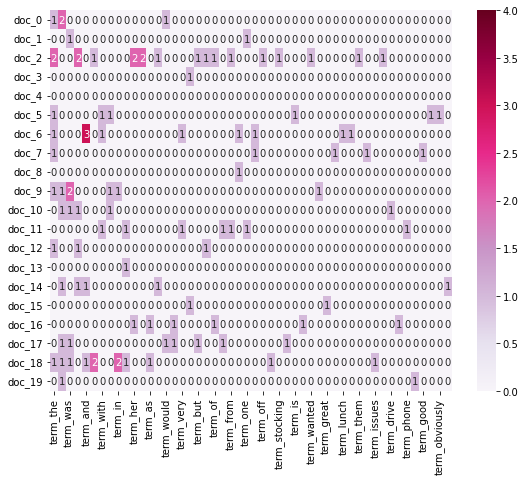

In [64]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=4, annot=True)

In [65]:
from sklearn.decomposition import PCA

In [66]:
DS_reduced = PCA(n_components=2).fit_transform(DS_counts.toarray())

In [67]:
DS_reduced.shape

(2714, 2)

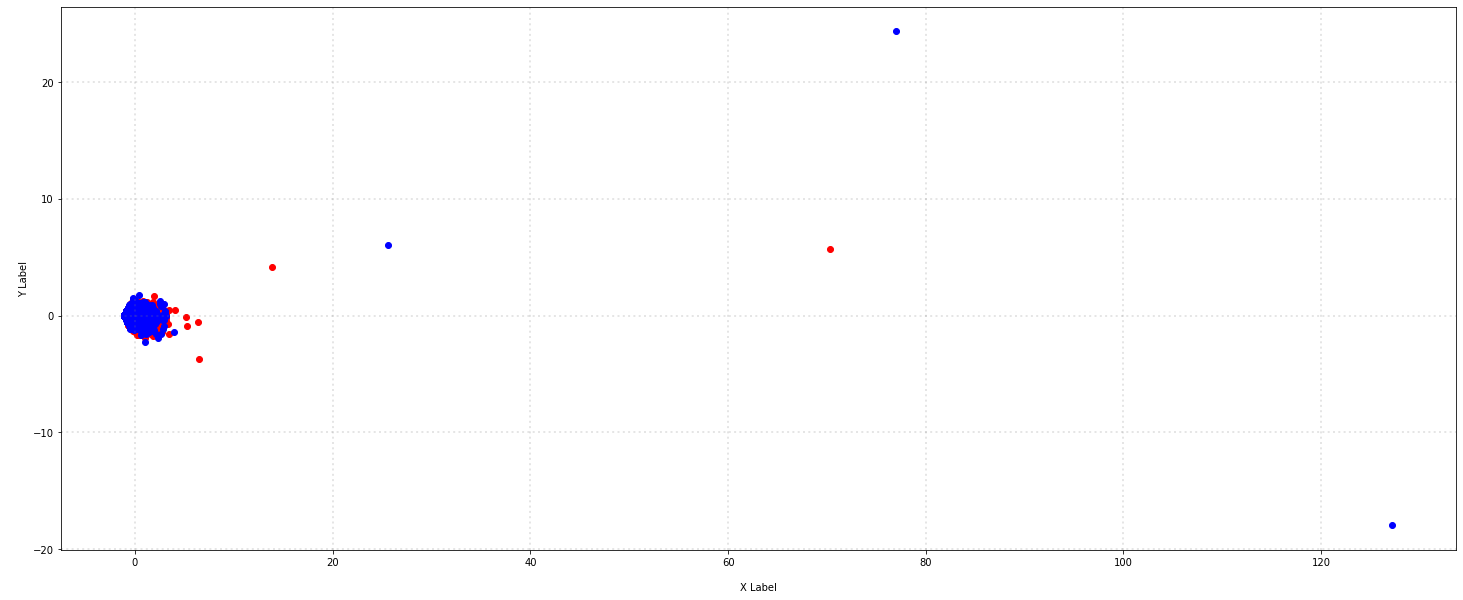

In [68]:
col = ['r', 'blue']

categories = ['1', '0']
fig = plt.figure(figsize = (25, 10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = DS_reduced[DS['score'] == category].T[0]
    ys = DS_reduced[DS['score'] == category].T[1]
    
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [69]:
term_frequencies = sum(DS_counts).toarray()[0]

In [70]:
term_frequencies.shape

(5153,)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


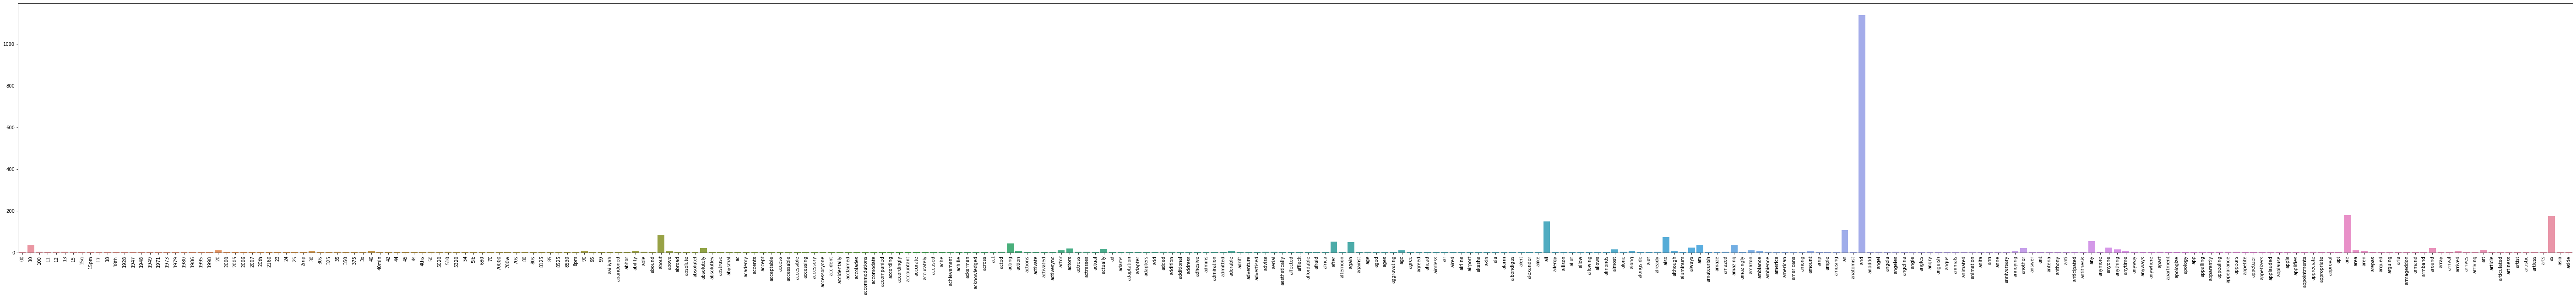

In [71]:
plt.subplots(figsize=(100, 10))
bar = sns.barplot(x=count_vect.get_feature_names()[:300],
                 y=term_frequencies[:300])
bar.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [72]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


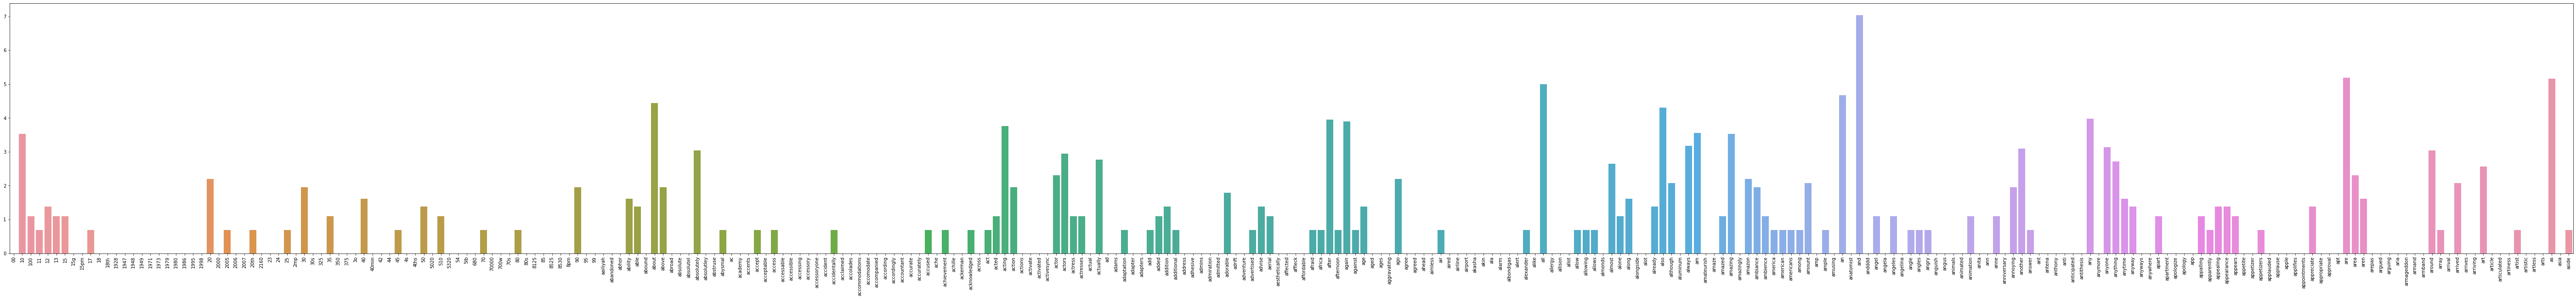

In [73]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [74]:
from sklearn import preprocessing , metrics, decomposition, pipeline, dummy

In [75]:
mlb = preprocessing.LabelBinarizer()

In [76]:
mlb.fit(DS.lib)

LabelBinarizer()

In [77]:
mlb.classes_

array([0., 1., 2.])

In [78]:
DS['bin_category'] = mlb.transform(DS['lib']).tolist()

In [79]:
DS[0:9]

,text,score,lib_name,lib,unigrams,bin_category
0,It does everything the description said it would.,1,amazon_cells,0.0,"[It, does, everything, the, description, said,...","[1, 0, 0]"
1,"After one bite, I was hooked.",1,yelp,2.0,"[After, one, bite, ,, I, was, hooked, .]","[0, 0, 1]"
2,"Garbo, who showed right off the bat that her t...",1,imdb,1.0,"[Garbo, ,, who, showed, right, off, the, bat, ...","[0, 1, 0]"
3,Reasonably priced also!,1,yelp,2.0,"[Reasonably, priced, also, !]","[0, 0, 1]"
4,Essentially you can forget Microsoft's tech su...,0,amazon_cells,0.0,"[Essentially, you, can, forget, Microsoft, 's,...","[1, 0, 0]"
5,Obviously there is a problem with the adhesive.,0,amazon_cells,0.0,"[Obviously, there, is, a, problem, with, the, ...","[1, 0, 0]"
6,My husband and I ate lunch here and were very ...,0,yelp,2.0,"[My, husband, and, I, ate, lunch, here, and, w...","[0, 0, 1]"
7,"On the up side, their cafe serves really good ...",1,yelp,2.0,"[On, the, up, side, ,, their, cafe, serves, re...","[0, 0, 1]"
8,I'm a bit disappointed.,0,amazon_cells,0.0,"[I, 'm, a, bit, disappointed, .]","[1, 0, 0]"


In [80]:
doc_to_transform_1 = []
random_record_1 = DS.iloc[50]
random_record_1 = random_record_1['text']
doc_to_transform_1.append(random_record_1)

doc_to_transform_2 = []
random_record_2 = DS.iloc[100]
random_record_2 = random_record_2['text']
doc_to_transform_2.append(random_record_2)

doc_to_transform_3 = []
random_record_3 = DS.iloc[150]
random_record_3 = random_record_3['text']
doc_to_transform_3.append(random_record_3)

In [81]:
print(doc_to_transform_1)
print(doc_to_transform_2)
print(doc_to_transform_3)

['Just what I wanted.']
["If it were possible to give them zero stars, they'd have it."]
['Very very fun chef.']


In [82]:
from sklearn.preprocessing import binarize

In [83]:
doc_vect_count_1 = count_vect.transform(doc_to_transform_1)
doc_vect_count_2 = count_vect.transform(doc_to_transform_2)
doc_vect_count_3 = count_vect.transform(doc_to_transform_3)

In [84]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(doc_vect_count_1, doc_vect_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(doc_vect_count_1, doc_vect_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(doc_vect_count_1, doc_vect_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(doc_vect_count_2, doc_vect_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
